In [1]:
import numpy as np
import pandas as pd
import sqlite3
import os
import calendar
from datetime import datetime
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#https://www.msci.com/documents/10199/8d97d244-4685-4200-a24c-3e2942e3adeb

#TopN_ROC_XPeriod.apx
#ListPrice.afl

In [38]:
data_path=r"D:\PythonDev\MyQuantFinProject\Data"
data_file=f"{data_path}\World2014-0722.csv"
title="3Worlds_y14-0722"

from_month_str='2014-01'
to_month_str='2022-07'

if os.path.exists(data_file):
  print(data_file)
else:
  raise Exception(f"Not found {data_file}")  
    
database_file=r'D:\JupyterCode\MyQuantFinProject\DataBase\FinTradeAnalytics.sqlite3'
result_path=r"D:\JupyterCode\MyQuantFinProject\Report"

# sample file=D:\JupyterCode\MyQuantFinProject\FundProjectDocs\Region



tf_nPart=0

requiredMAData=False

buildtime = datetime.now().strftime('%d%m%y_%H%M')

title=f'{title}_bt{buildtime}'
print(title)




list_fund_name=[]
list_ex_fund=[]

removed_symbolList=[]
mix_symbolList=[]
# mix_symbolList=[
#                 { 'MyTheme':[{'GIMPACT-KKP':0.25},{'B-GTO':0.25},{'GlobEnv B-SIP':0.3},{'CleanEng B-SIP':0.2} ] }
#                 ,{ 'MyWorld':[{'ACWI':0.5},{'SPY':0.5} ] }  
#                ]     

D:\JupyterCode\MyQuantFinProject\Data\World2014-0722.csv
3Worlds_y14-0722_bt100722_1056


In [39]:
# wait to implement
print("check valid combination")
if len(mix_symbolList)>0:
    
    AllFunds =meta_df['Name'].tolist()
    print("All Master Funds")
    print(AllFunds)

    NotInAllFunds=[]
    WeightsError=[]
    for  mix_symbol  in mix_symbolList:    
      for new_fund, fundList in mix_symbol.items():
        print(f"==========={new_fund} # List Sub-Fund and its Weight===========") 
        sum_weights =0
        for fundDict  in fundList: 
            print(fundDict)  

            for  xfund, xweights in fundDict.items():

             # check whether the fund are in master list   
              if xfund  not in AllFunds:
                 NotInAllFunds.append(xfund)  


              sum_weights+=xweights

        if  sum_weights!=1:
             WeightsError.append(mix_symbol)



    # print(mix_symbolList)

    if len(NotInAllFunds)>0 or len(WeightsError)>0:
       print("################# Error #################") 
       if len(NotInAllFunds)>0 :
        print("=======================Not In All Master Funds=======================")
        print(NotInAllFunds)
       if len(WeightsError)>0:
        print("=======================Weights Error=======================")
        print(WeightsError)      
       raise Exception(f"Some sub-funds are not in {AllFunds} or SumOFWeights is not equal to 1")  
else:
    print("no combination")
    

check valid combination
no combination


In [40]:
print("Load Price Data")

df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df=df.loc[from_month_str:to_month_str,:]


df.index.set_names('date',inplace=True)
df=df.rename(columns={'Ticker':'symbol','close':'price'})

df=df[['symbol','price']]

list_fund_name=df['symbol'].unique().tolist()  

print(df.head())
print(df.tail())

Load Price Data
           symbol  price
date                    
2014-01-02   ACWI  56.80
2014-01-03   ACWI  56.77
2014-01-06   ACWI  56.59
2014-01-07   ACWI  56.89
2014-01-08   ACWI  56.87
           symbol   price
date                     
2022-07-01    SPY  381.24
2022-07-05    SPY  381.96
2022-07-06    SPY  383.25
2022-07-07    SPY  388.99
2022-07-08    SPY  388.67


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_13000\2287400960.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df=df.loc[from_month_str:to_month_str,:]


In [41]:
# option#1 load form database
print("Connect SQLite")
conn = sqlite3.connect(os.path.abspath(database_file))

print("Load Invest Period")
period_df= pd.read_sql_query("select * from InvestPeriod where IsActive = 1", conn)
print(period_df.info())
period_df.tail()

# option#2 Create Split Time

Connect SQLite
Load Invest Period
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Start     17 non-null     object
 1   End       17 non-null     object
 2   IsActive  17 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 536.0+ bytes
None


,Start,End,IsActive
12,11-2020,03-2021,1
13,04-2021,07-2021,1
14,08-2021,10-2021,1
15,11-2021,01-2022,1
16,02-2022,12-2022,1


In [42]:

def find_last_date_month(item):
  item=str(item)
  x = datetime.strptime(item, '%m-%Y')  

  end_date_object=x.replace(day = calendar.monthrange(x.year, x.month)[1]) 
  return   end_date_object
    

period_df['Start_Date']=pd.to_datetime(period_df['Start'],format='%m-%Y')
period_df['End_Date']=period_df['End'].apply(find_last_date_month)
period_df['IsSelected']=1
print(period_df.info())

#temp datra
#period_df=period_df.loc[:3]
print(period_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       17 non-null     object        
 1   End         17 non-null     object        
 2   IsActive    17 non-null     int64         
 3   Start_Date  17 non-null     datetime64[ns]
 4   End_Date    17 non-null     datetime64[ns]
 5   IsSelected  17 non-null     int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 944.0+ bytes
None
      Start      End  IsActive Start_Date   End_Date  IsSelected
0   01-2014  12-2014         1 2014-01-01 2014-12-31           1
1   01-2015  12-2015         1 2015-01-01 2015-12-31           1
2   01-2016  08-2016         1 2016-01-01 2016-08-31           1
3   09-2016  07-2017         1 2016-09-01 2017-07-31           1
4   08-2017  03-2018         1 2017-08-01 2018-03-31           1
5   04-2018  06-2018         1 2018-04-01 201

In [43]:
print("Validate Time Series To Test in InvestPeriod Table")
list_period=[]
for index, row in period_df.iterrows():
    list_period.append(row["Start_Date"]) # start
    list_period.append(row["End_Date"]) #end
    
#print(list_period)

start_test=list_period[0]

for idx in range(1,len(list_period)):
    #print(list_period[idx])
    if list_period[idx]<=list_period[idx-1]:
      raise Exception(f"Error: {list_period[idx]} must be greater than {list_period[idx-1]}")   

print("Time series validation completed")   

Validate Time Series To Test in InvestPeriod Table
Time series validation completed


In [44]:
print("Load All data from all fund to store in List")
dictPriceOfFund={}
list_startDate=[]
list_endDate=[]

print(list_fund_name)
for name in list_fund_name:
    
  fund_df=df.query('symbol==@name')
  fund_df=fund_df[['price']]
  fund_df.sort_index(inplace=True)  
    
    
  
  dictPriceOfFund[name]=fund_df
  print(f"============================={name}=============================")  
  print(fund_df.head(3))   
  print(fund_df.tail(3))  

  list_startDate.append(fund_df.index[0])
  list_endDate.append(fund_df.index[len(fund_df)-1])  
    
    

Load All data from all fund to store in List
['ACWI', 'QQQ', 'SPY']
=============================ACWI=============================
            price
date             
2014-01-02  56.80
2014-01-03  56.77
2014-01-06  56.59
            price
date             
2022-07-06  84.17
2022-07-07  85.51
2022-07-08  85.45
=============================QQQ=============================
            price
date             
2014-01-02  87.27
2014-01-03  86.64
2014-01-06  86.32
             price
date              
2022-07-06  288.80
2022-07-07  294.98
2022-07-08  295.35
=============================SPY=============================
             price
date              
2014-01-02  182.92
2014-01-03  182.89
2014-01-06  182.36
             price
date              
2022-07-06  383.25
2022-07-07  388.99
2022-07-08  388.67


In [45]:
list_fund_name

['ACWI', 'QQQ', 'SPY']

In [46]:
list_startDate

[Timestamp('2014-01-02 00:00:00'),
 Timestamp('2014-01-02 00:00:00'),
 Timestamp('2014-01-02 00:00:00')]

In [47]:
print("Find latest date for starting test")
print(list_startDate)
latest_start_date=max(list_startDate)



print("Find  earliest date for ending test")
print( list_endDate)
earliest_start_date=min(list_endDate)

print("=========================================")
print('Latest start =',latest_start_date)
print('Earliest end =' ,earliest_start_date)


Find latest date for starting test
[Timestamp('2014-01-02 00:00:00'), Timestamp('2014-01-02 00:00:00'), Timestamp('2014-01-02 00:00:00')]
Find  earliest date for ending test
[Timestamp('2022-07-08 00:00:00'), Timestamp('2022-07-08 00:00:00'), Timestamp('2022-07-08 00:00:00')]
Latest start = 2014-01-02 00:00:00
Earliest end = 2022-07-08 00:00:00


In [48]:
first_month_to_test=period_df.loc[0,"Start_Date"]

if latest_start_date>first_month_to_test:
 print(f"Latest Start at {latest_start_date} is greater than {first_month_to_test}")   
 print("Find Range Fpr Starting Now!!!")
 for index, row in period_df.iterrows():
    #print( f"{index}: {row['Start_Date']} - {row['End_Date']}")
    if (latest_start_date>=row['Start_Date']) and (latest_start_date<=row['End_Date']):
        
        print( f"Found Start-Range = {index}: {row['Start_Date']} - {row['End_Date']}")
        period_df.loc[index,'Start_Date']=latest_start_date
        period_df.loc[index,'Start']=latest_start_date.strftime("%m-%Y")
        break
    else:
        period_df.loc[index,'IsSelected']=0
else:
 print(f"Test All range because Latest Start at {latest_start_date} is less than {first_month_to_test}") 
        
period_df=period_df.query("IsSelected==1")
period_df.reset_index(drop=True,inplace=True)
period_df

Latest Start at 2014-01-02 00:00:00 is greater than 2014-01-01 00:00:00
Find Range Fpr Starting Now!!!
Found Start-Range = 0: 2014-01-01 00:00:00 - 2014-12-31 00:00:00


,Start,End,IsActive,Start_Date,End_Date,IsSelected
0,01-2014,12-2014,1,2014-01-02,2014-12-31,1
1,01-2015,12-2015,1,2015-01-01,2015-12-31,1
2,01-2016,08-2016,1,2016-01-01,2016-08-31,1
3,09-2016,07-2017,1,2016-09-01,2017-07-31,1
4,08-2017,03-2018,1,2017-08-01,2018-03-31,1
5,04-2018,06-2018,1,2018-04-01,2018-06-30,1
6,07-2018,09-2018,1,2018-07-01,2018-09-30,1
7,10-2018,12-2018,1,2018-10-01,2018-12-31,1
8,01-2019,07-2019,1,2019-01-01,2019-07-31,1
9,08-2019,03-2020,1,2019-08-01,2020-03-31,1


In [49]:
# new version
last_month_to_test=period_df.loc[len(period_df)-1,'End_Date']
# print(last_month_to_test)

if earliest_start_date<last_month_to_test:
    
 print(f"Latest End at {earliest_start_date} is less than {last_month_to_test}")   
 print("Find Range For Finishing Now!!!")
 
 last_row_to_spot_end=period_df.shape[0];
 for index, row in period_df.iterrows():
    
    if (earliest_start_date>=row['Start_Date']) and (earliest_start_date<=row['End_Date']):
        
        print( f"Found End-Range = {index}: {row['Start_Date']} - {row['End_Date']}")
        period_df.loc[index,'End_Date']=earliest_start_date
        period_df.loc[index,'End']=earliest_start_date.strftime("%m-%Y")
        
        last_row_to_spot_end=index
        print(f"Update last row = {last_row_to_spot_end}")
        
        break
else:
 print(f"Test All range because Earliest end at {earliest_start_date} is less than {last_month_to_test}") 


if  last_row_to_spot_end<period_df.shape[0]:
 period_df=period_df.iloc[0:(last_row_to_spot_end+1),:]

period_df=period_df.reset_index(drop=True)        
period_df

# old verion
# if  earliest_start_date> period_df.loc[len(period_df)-1,'Start_Date']:
#   period_df.loc[len(period_df)-1,'End_Date']=earliest_start_date
# else:
#   raise Exception(f"Error {earliest_start_date} is less than start date of last period test at {period_df.loc[len(period_df)-1,'Start_Date']}")   


Latest End at 2022-07-08 00:00:00 is less than 2022-12-31 00:00:00
Find Range For Finishing Now!!!
Found End-Range = 16: 2022-02-01 00:00:00 - 2022-12-31 00:00:00
Update last row = 16


,Start,End,IsActive,Start_Date,End_Date,IsSelected
0,01-2014,12-2014,1,2014-01-02,2014-12-31,1
1,01-2015,12-2015,1,2015-01-01,2015-12-31,1
2,01-2016,08-2016,1,2016-01-01,2016-08-31,1
3,09-2016,07-2017,1,2016-09-01,2017-07-31,1
4,08-2017,03-2018,1,2017-08-01,2018-03-31,1
5,04-2018,06-2018,1,2018-04-01,2018-06-30,1
6,07-2018,09-2018,1,2018-07-01,2018-09-30,1
7,10-2018,12-2018,1,2018-10-01,2018-12-31,1
8,01-2019,07-2019,1,2019-01-01,2019-07-31,1
9,08-2019,03-2020,1,2019-08-01,2020-03-31,1


In [50]:
fundPerfByPeriod_df=period_df.copy()
period_df=None

fundPerfByPeriod_df["No.Month"]=((fundPerfByPeriod_df["End_Date"]-fundPerfByPeriod_df["Start_Date"])/np.timedelta64(1, 'M')).round(0)

fundPerfByPeriod_df['st'] = fundPerfByPeriod_df['Start_Date'].dt.strftime('%d%b%y')
fundPerfByPeriod_df['ed'] = fundPerfByPeriod_df['End_Date'].dt.strftime('%d%b%y')
fundPerfByPeriod_df['Period']= fundPerfByPeriod_df['st'].str.cat(fundPerfByPeriod_df['ed'], sep='-')
fundPerfByPeriod_df.drop(columns=['st','ed'],inplace=True)

fundPerfByPeriod_df

,Start,End,IsActive,Start_Date,End_Date,IsSelected,No.Month,Period
0,01-2014,12-2014,1,2014-01-02,2014-12-31,1,12.0,02Jan14-31Dec14
1,01-2015,12-2015,1,2015-01-01,2015-12-31,1,12.0,01Jan15-31Dec15
2,01-2016,08-2016,1,2016-01-01,2016-08-31,1,8.0,01Jan16-31Aug16
3,09-2016,07-2017,1,2016-09-01,2017-07-31,1,11.0,01Sep16-31Jul17
4,08-2017,03-2018,1,2017-08-01,2018-03-31,1,8.0,01Aug17-31Mar18
5,04-2018,06-2018,1,2018-04-01,2018-06-30,1,3.0,01Apr18-30Jun18
6,07-2018,09-2018,1,2018-07-01,2018-09-30,1,3.0,01Jul18-30Sep18
7,10-2018,12-2018,1,2018-10-01,2018-12-31,1,3.0,01Oct18-31Dec18
8,01-2019,07-2019,1,2019-01-01,2019-07-31,1,7.0,01Jan19-31Jul19
9,08-2019,03-2020,1,2019-08-01,2020-03-31,1,8.0,01Aug19-31Mar20


In [51]:
def cal_percent_return(item,fundTemp_df):
    
    start_from=item['Start_Date']
    end_to=item['End_Date']
    
    tempDF=fundTemp_df.loc[start_from:end_to,:]
    
    start_price=float(tempDF.iloc[0, 0])  
    end_price=float(tempDF.iloc[len(tempDF)-1, 0])
    
    print(f'{start_from} to {end_to} = {start_price} to {end_price}')
    
    invest_return =(end_price-start_price)/start_price*100
    invest_return=round(invest_return,1)
    #print(tempDF)                          
    print(f"Return=> : { start_price} - {end_price}= {invest_return} %")   
    return invest_return
                                                              
print("Calcualte percentage of Performance return for each fund as given period investment")


for x_name,fund_df in dictPriceOfFund.items():
    
    
  print(f"=========================={x_name}==================================================")

#   print(fund_df.info())

  print("----------------------Head---------------------------------------")
  print(fund_df.head())  
    
  print("----------------------Tail---------------------------------------")  
  print(fund_df.tail())
    
    
  print(f"==========================cal_percent_return==================================================")
  fundPerfByPeriod_df[x_name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(fund_df,))
  print("***********************************************************************************************")


Calcualte percentage of Performance return for each fund as given period investment
==========================ACWI==================================================
----------------------Head---------------------------------------
            price
date             
2014-01-02  56.80
2014-01-03  56.77
2014-01-06  56.59
2014-01-07  56.89
2014-01-08  56.87
----------------------Tail---------------------------------------
            price
date             
2022-07-01  84.48
2022-07-05  84.05
2022-07-06  84.17
2022-07-07  85.51
2022-07-08  85.45
==========================cal_percent_return==================================================
2014-01-02 00:00:00 to 2014-12-31 00:00:00 = 56.8 to 58.5
Return=> : 56.8 - 58.5= 3.0 %
2015-01-01 00:00:00 to 2015-12-31 00:00:00 = 58.36 to 55.82
Return=> : 58.36 - 55.82= -4.4 %
2016-01-01 00:00:00 to 2016-08-31 00:00:00 = 54.83 to 58.55
Return=> : 54.83 - 58.55= 6.8 %
2016-09-01 00:00:00 to 2017-07-31 00:00:00 = 58.76 to 67.28
Return=> : 58.76 - 67.2

# Create Directoy to store report

In [52]:
report_path=os.path.join(result_path, title )
chart_path=os.path.join(report_path,"chart_price" ) 

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path)  
 if not os.path.exists(chart_path):
     os.mkdir(chart_path)       
     
except OSError as error:  
    raise error
    
print(report_path)
print(chart_path)

D:\JupyterCode\MyQuantFinProject\Report\3Worlds_y14-0722_bt100722_1056
D:\JupyterCode\MyQuantFinProject\Report\3Worlds_y14-0722_bt100722_1056\chart_price


# Plot Line Chart  to compare percentage

In [53]:
period_df=fundPerfByPeriod_df.loc[:,["Start_Date","End_Date"]]
len_period_xyz=len(period_df)

# split as your want
if tf_nPart>0 and tf_nPart<len_period_xyz:
  tf_nPart=math.floor(len_period_xyz/tf_nPart)  

else:
  tf_nPart=len_period_xyz  
# split half    
array_tf = np.array_split(period_df, tf_nPart)
array_tf_half = np.array_split(period_df, 2)
array_tf.extend(array_tf_half)
# add all
array_tf.append(period_df)

print(f'No-partition = {len(array_tf)} of {len_period_xyz} periods')

No-partition = 20 of 17 periods


In [54]:
def create_pct_acc_df(df_temp,start_pct,end_pct):
    
 df_temp=fund_df.loc[start_pct:end_pct,:]
 df_temp=df_temp.pct_change()
 df_temp=(1+df_temp).cumprod()  #1 is starting point
 df_temp=df_temp.rename(columns={'price':'cum_return_pct'})
 df_temp.fillna(1,inplace=True)

 return df_temp 


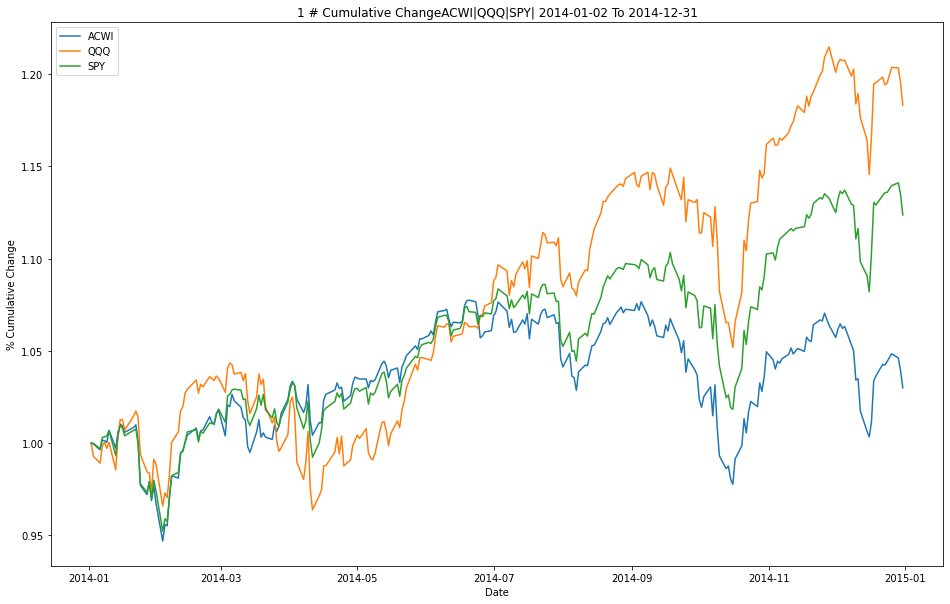

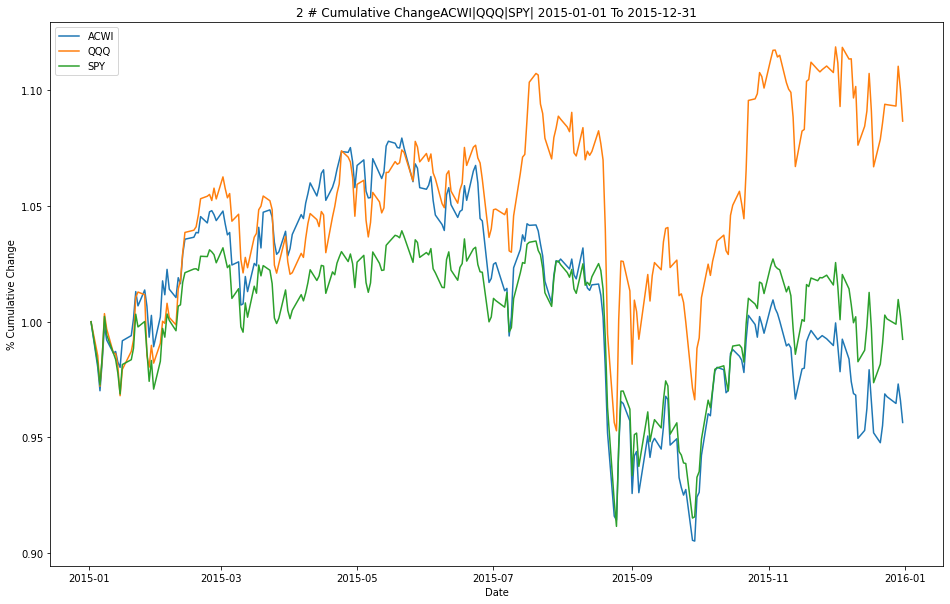

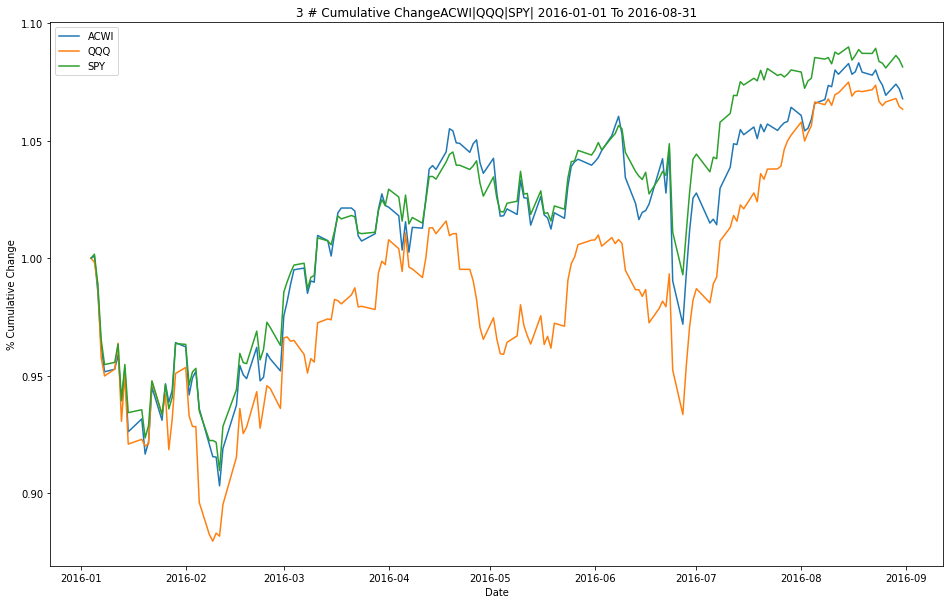

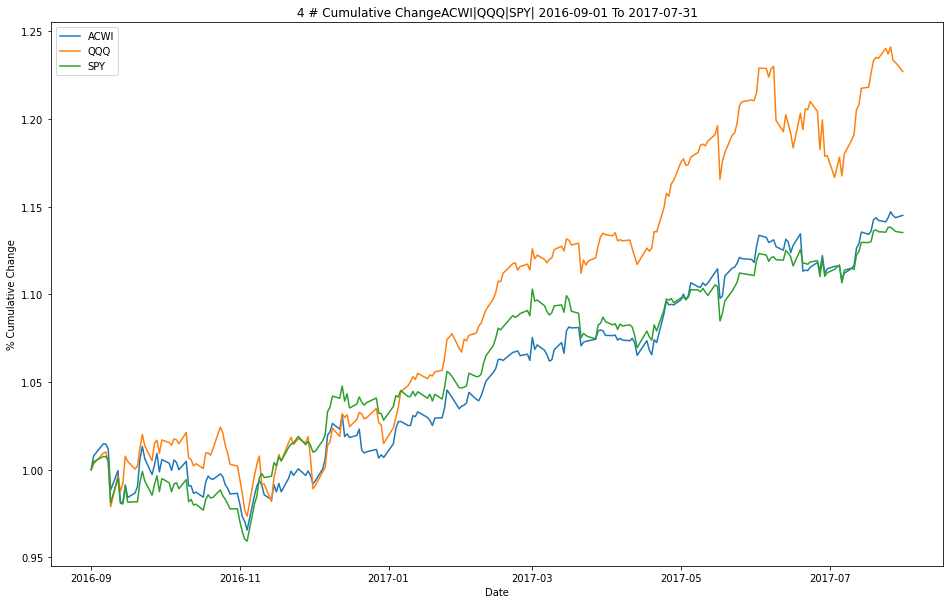

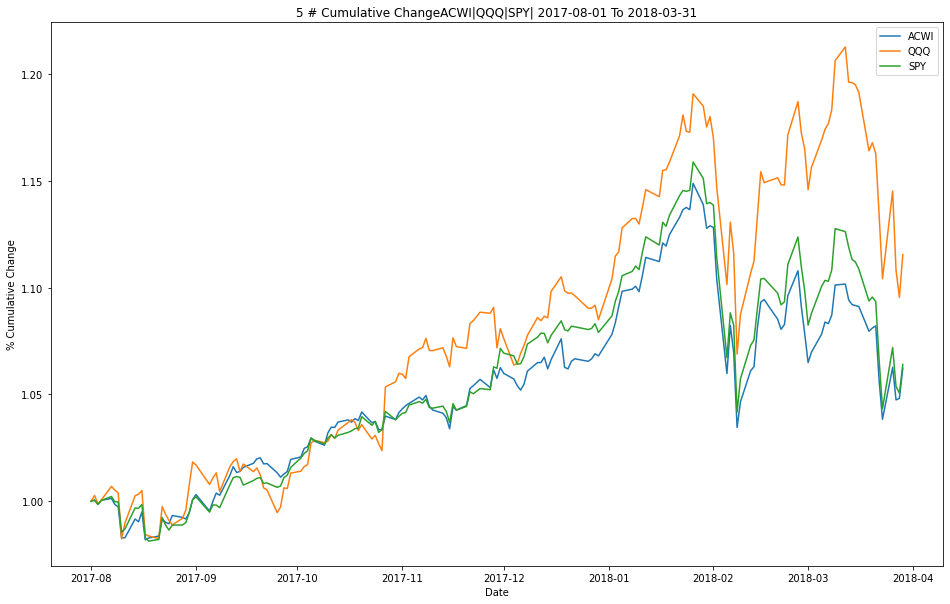

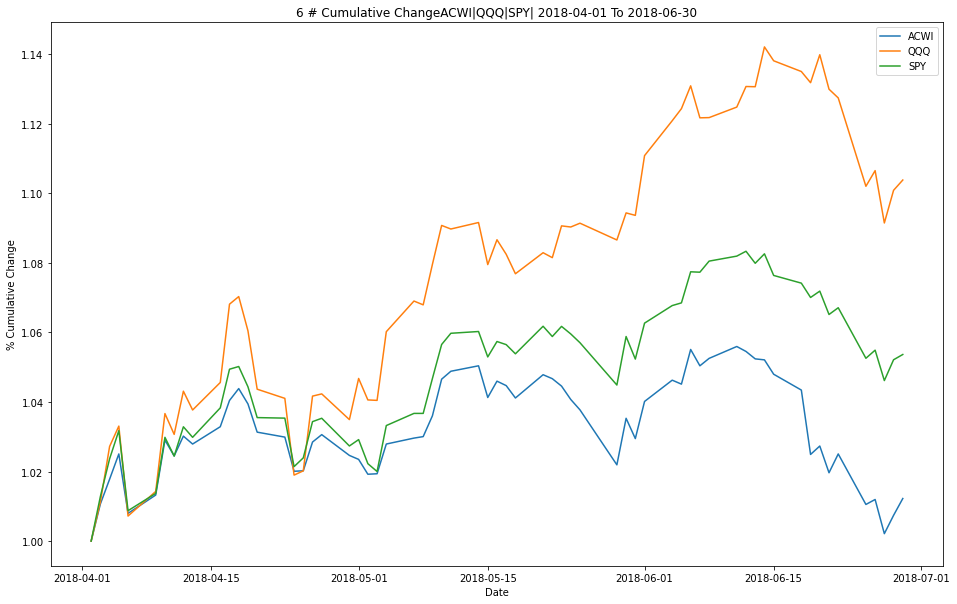

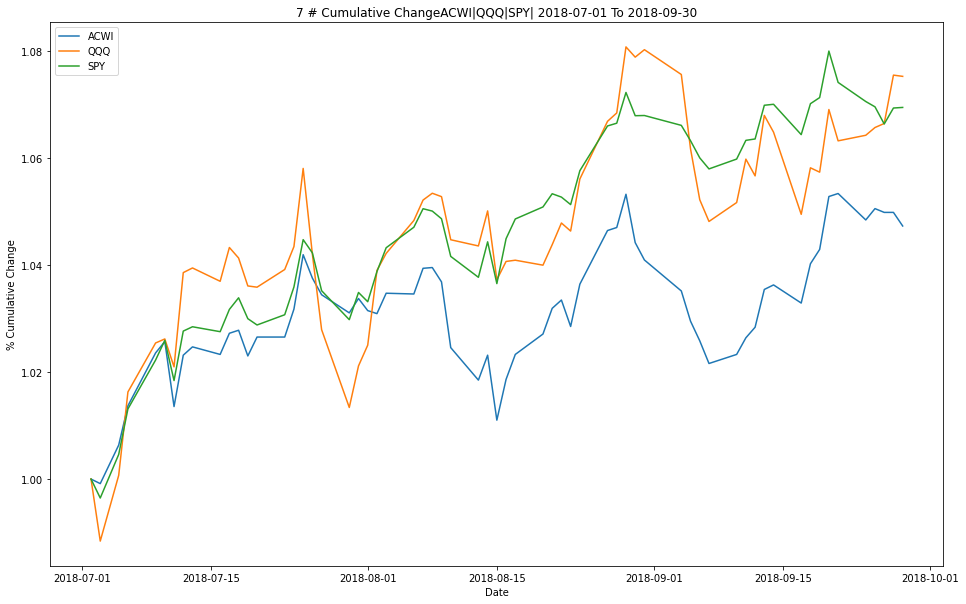

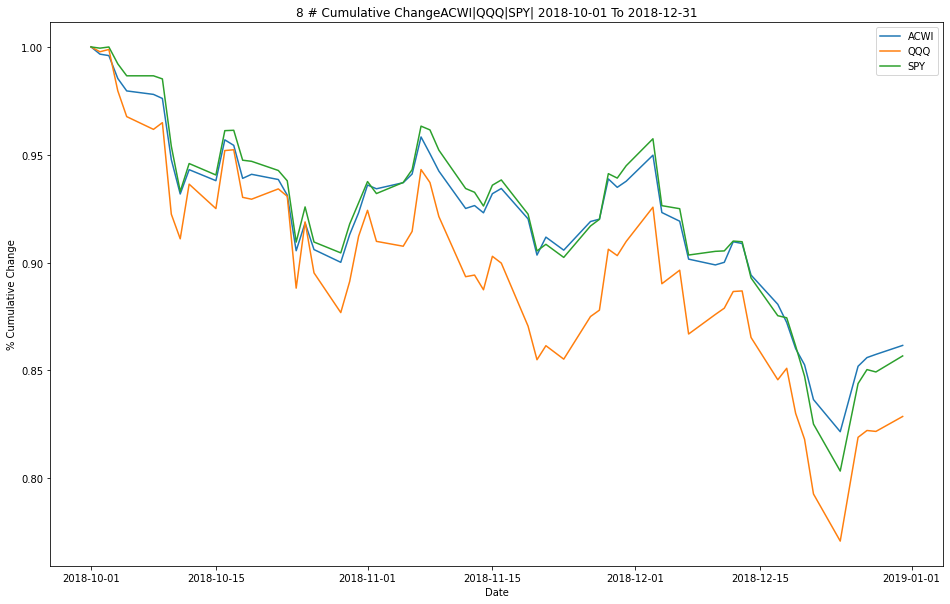

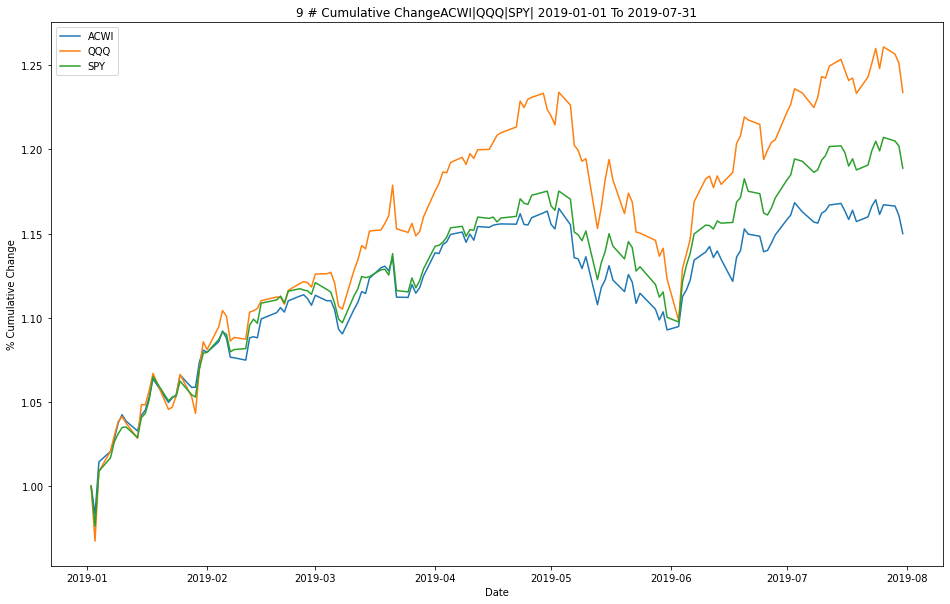

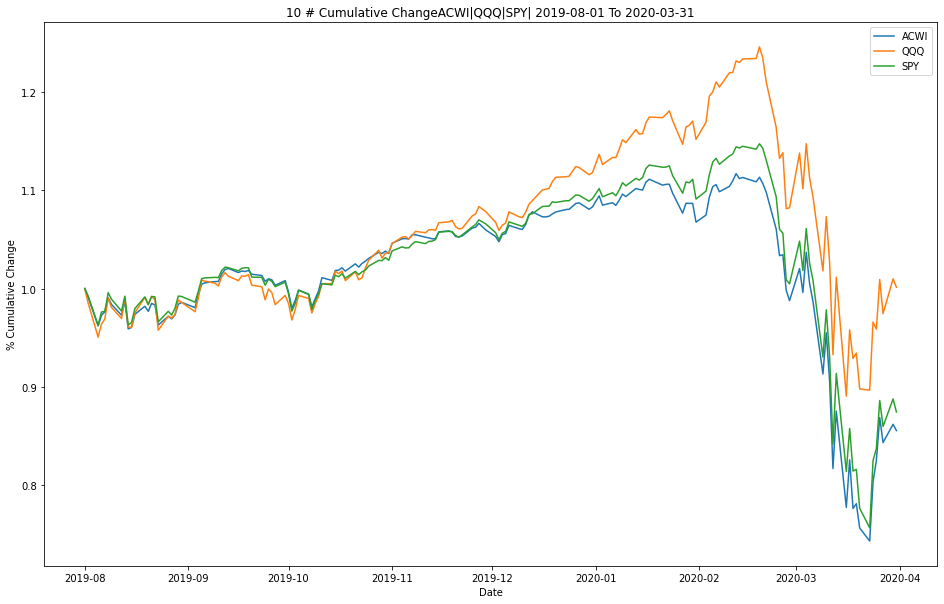

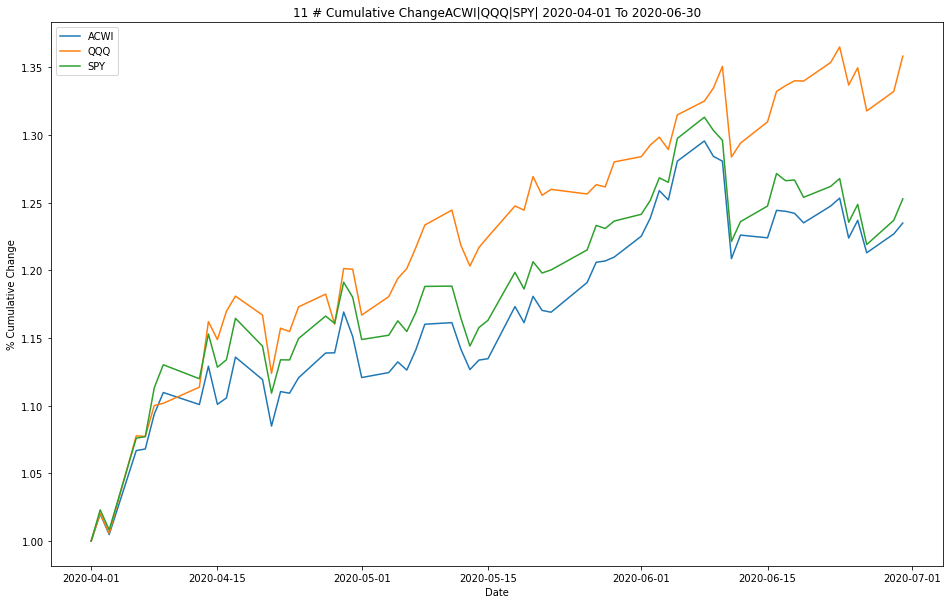

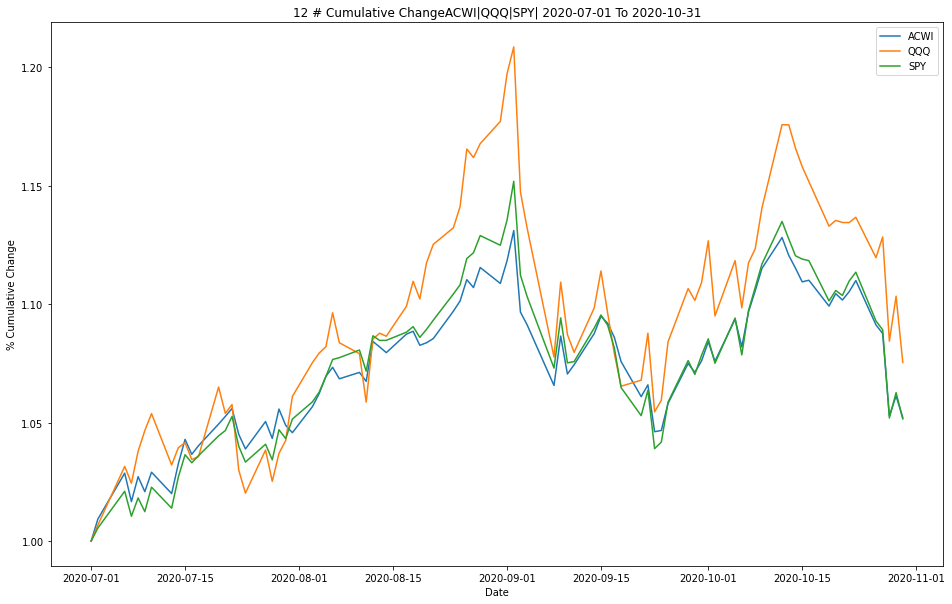

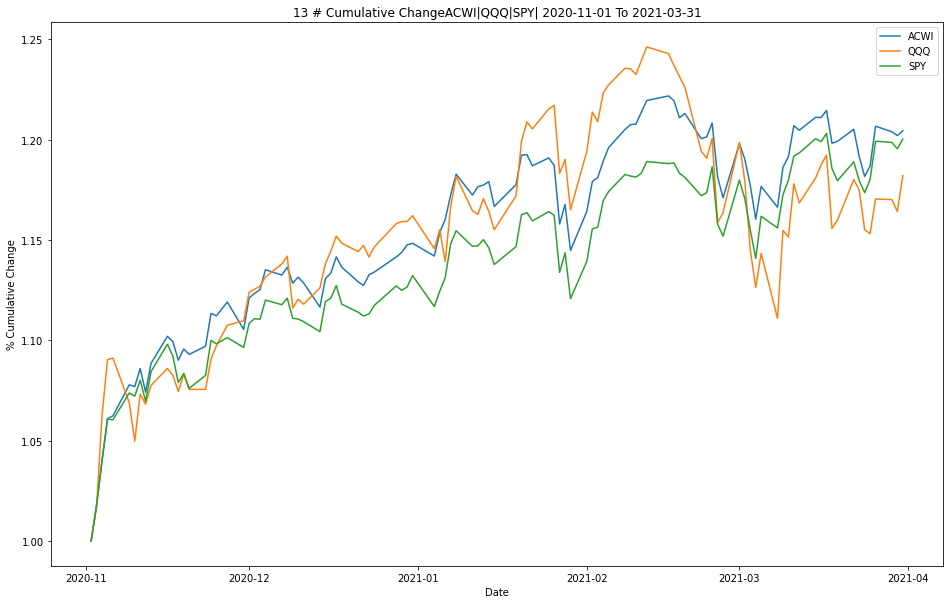

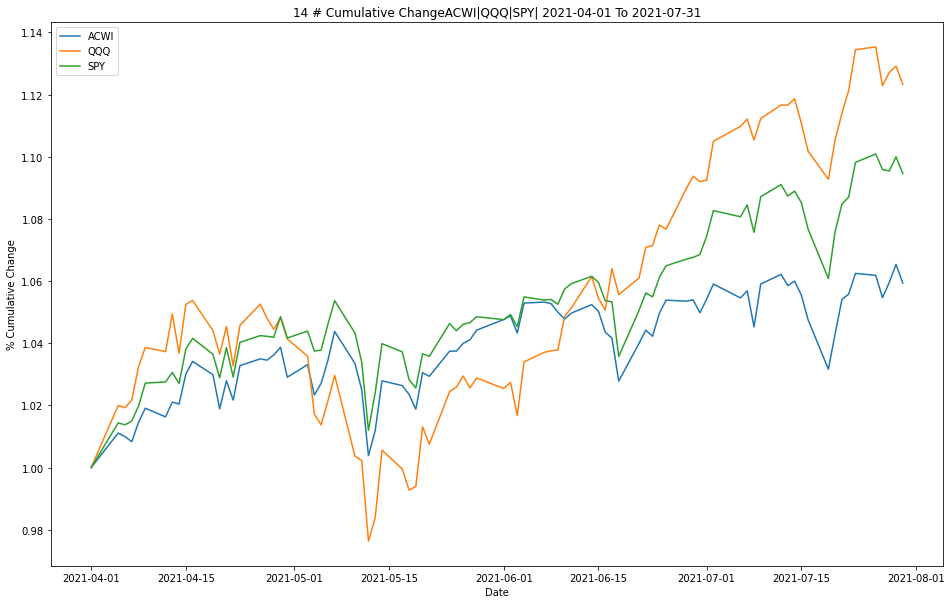

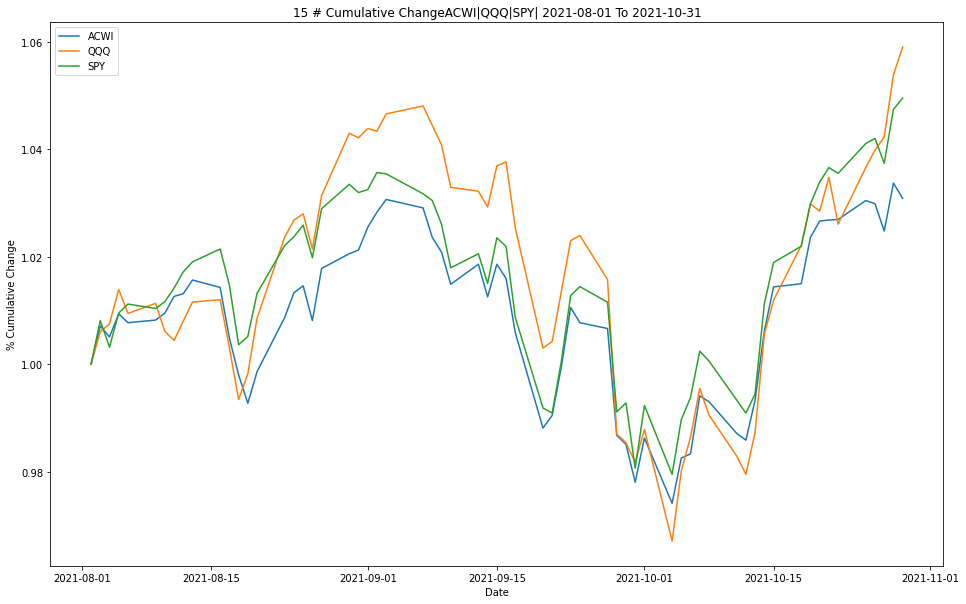

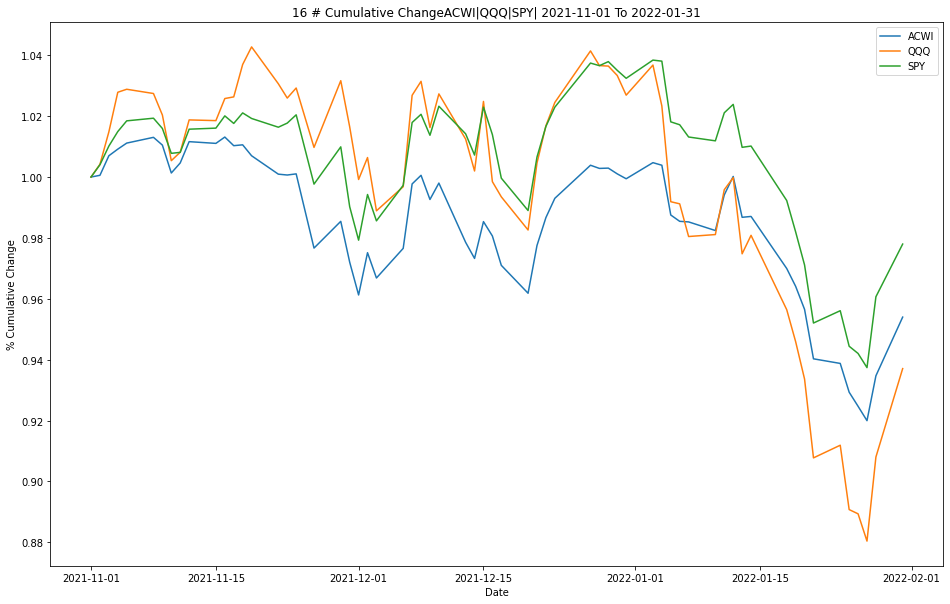

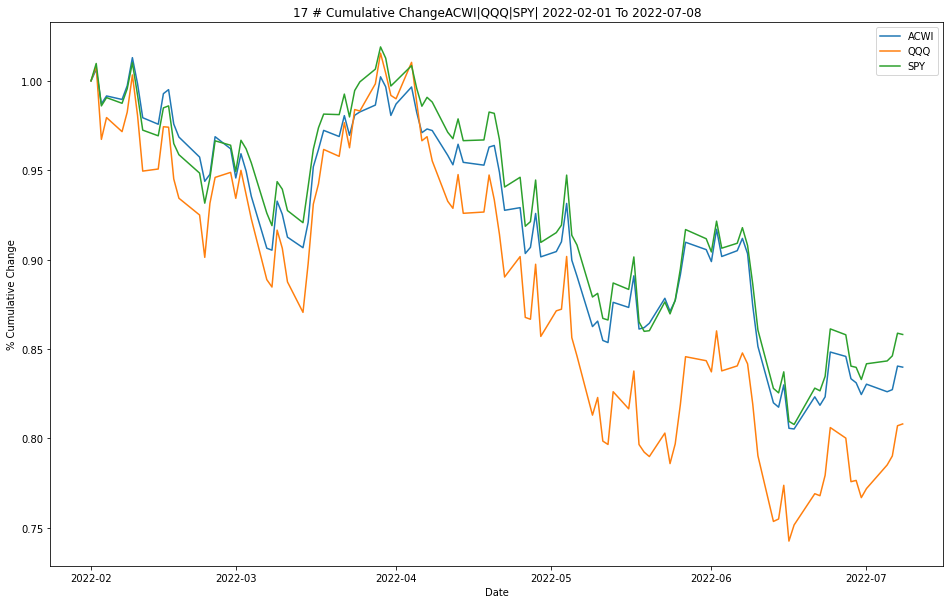

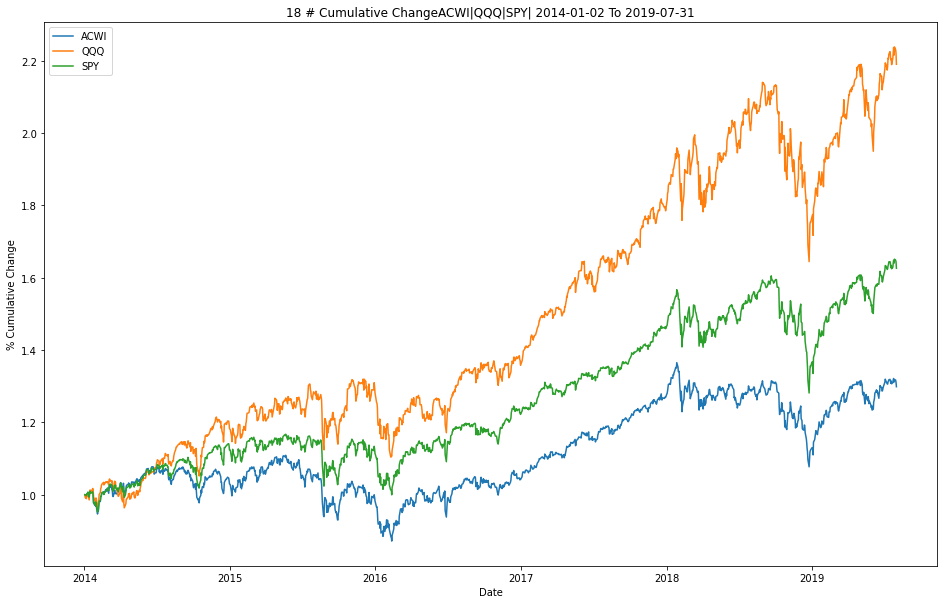

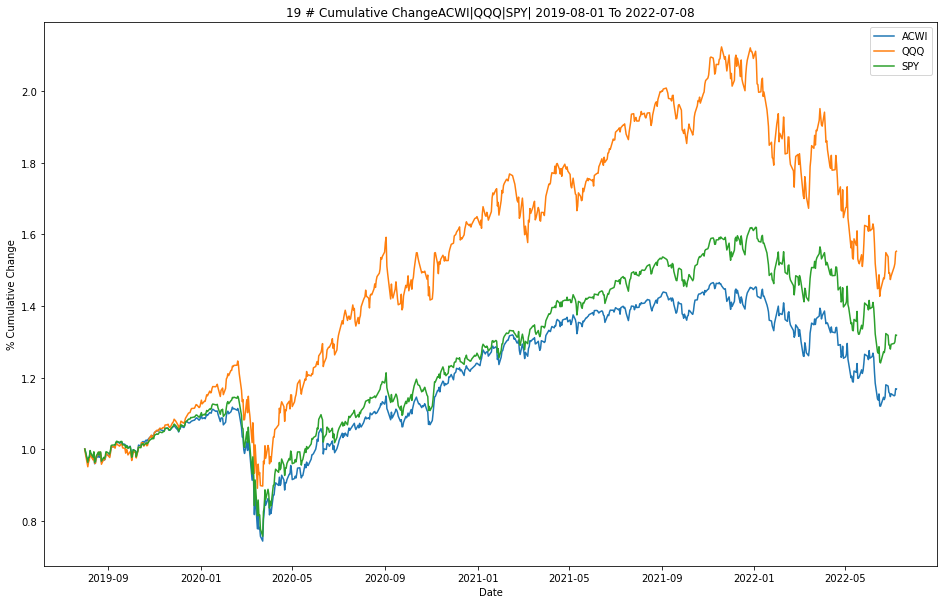

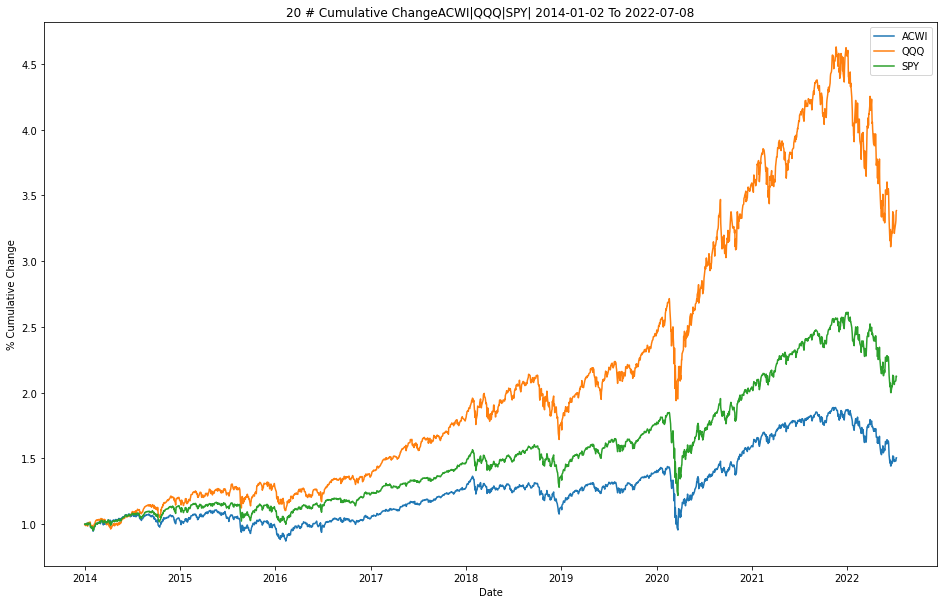

In [55]:
# loop period of time
count_pic=0
for x in array_tf:
    
    x.reset_index(drop=True,inplace=True)
    start_pct=x.loc[0,"Start_Date"].strftime('%Y-%m-%d')
    end_pct=x.loc[len(x)-1,"End_Date"].strftime('%Y-%m-%d')
    
    fig = plt.figure(figsize = (16, 10))
    symbols=''
    for x_name,fund_df in dictPriceOfFund.items():

          df=create_pct_acc_df(fund_df,start_pct,end_pct)  
          #print(f'==========={x_name}==================')    
          #  print(df.head(5))   
          #  print(df.tail(5))    

          plt.plot(df.index,df['cum_return_pct'],label =x_name)
          symbols += f'{x_name}|'

    plt.legend() 
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Change")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} # Cumulative Change{symbols} {start_pct} To {end_pct}")
    plt.savefig(f'{chart_path}\\{count_pic}#{start_pct}_{end_pct}.png')

    plt.show()



In [56]:
period_df=None
array_tf=None

In [57]:
#fundPerfByPeriod_df.drop(columns=["Start","End","IsSelected","IsActive"],inplace=True)

fundPerfByPeriod_df['Start_Date'] = fundPerfByPeriod_df['Start_Date'].dt.strftime('%d-%m-%Y')
fundPerfByPeriod_df['End_Date'] = fundPerfByPeriod_df['End_Date'].dt.strftime('%d-%m-%Y')

#MAs=[math.ceil(len(fundPerfByPeriod_df)/2),math.ceil(len(fundPerfByPeriod_df)/3)]
no_half_row=math.ceil(len(fundPerfByPeriod_df)/2)


fundPerfByPeriod_df.drop(columns=["Start","End","IsSelected","IsActive"],inplace=True)
fundPerfByPeriod_df.drop(columns=["Start_Date","End_Date"],inplace=True)
dictPriceOfFund=None

start_test=fundPerfByPeriod_df.loc[0,"Period"]
end_test=fundPerfByPeriod_df.loc[len(fundPerfByPeriod_df)-1,"Period"]

fundPerfByPeriod_df

,No.Month,Period,ACWI,QQQ,SPY
0,12.0,02Jan14-31Dec14,3.0,18.3,12.4
1,12.0,01Jan15-31Dec15,-4.4,8.7,-0.8
2,8.0,01Jan16-31Aug16,6.8,6.3,8.1
3,11.0,01Sep16-31Jul17,14.5,22.7,13.5
4,8.0,01Aug17-31Mar18,6.2,11.5,6.4
5,3.0,01Apr18-30Jun18,1.2,10.4,5.4
6,3.0,01Jul18-30Sep18,4.7,7.5,6.9
7,3.0,01Oct18-31Dec18,-13.8,-17.1,-14.3
8,7.0,01Jan19-31Jul19,15.0,23.4,18.9
9,8.0,01Aug19-31Mar20,-14.5,0.1,-12.6


In [58]:
print("create combination combination")
def combine_funds(item,listFundsToCombine):
    new_fund_sum=0
    for fundDict in listFundsToCombine:
      
      for  fund_name, fund_weights in fundDict.items():
       #print(fund_name , fund_weights)     
       new_fund_sum+=  item[fund_name]*fund_weights

    new_fund_avg=new_fund_sum
    #print(f'fundDict ={new_fund_avg}')
    return round (new_fund_avg,2)
 


for  mix_symbol  in mix_symbolList:
    for new_fund, fundList in mix_symbol.items():
        
       print(new_fund)
       print(fundList)
    
       fundPerfByPeriod_df[new_fund]= fundPerfByPeriod_df.apply(combine_funds,axis=1,args=(fundList,))
       fundPerfByPeriod_df.apply(combine_funds,axis=1,args=(fundList,))
    
       list_fund_name.append(new_fund)
       list_ex_fund.append(new_fund) 
    
    
print(list_fund_name)
print(list_ex_fund)

create combination combination
['ACWI', 'QQQ', 'SPY']
[]


In [59]:
print("Show Fund After any mixture funds")
fundPerfByPeriod_df 

Show Fund After any mixture funds


,No.Month,Period,ACWI,QQQ,SPY
0,12.0,02Jan14-31Dec14,3.0,18.3,12.4
1,12.0,01Jan15-31Dec15,-4.4,8.7,-0.8
2,8.0,01Jan16-31Aug16,6.8,6.3,8.1
3,11.0,01Sep16-31Jul17,14.5,22.7,13.5
4,8.0,01Aug17-31Mar18,6.2,11.5,6.4
5,3.0,01Apr18-30Jun18,1.2,10.4,5.4
6,3.0,01Jul18-30Sep18,4.7,7.5,6.9
7,3.0,01Oct18-31Dec18,-13.8,-17.1,-14.3
8,7.0,01Jan19-31Jul19,15.0,23.4,18.9
9,8.0,01Aug19-31Mar20,-14.5,0.1,-12.6


In [60]:
print("1-Actual Return")
fund_x=fundPerfByPeriod_df[['Period']+list_fund_name]
fund_x["_AVG_"]=fund_x[list_fund_name].mean(axis=1).round(1)

list_fund_name.append('_AVG_')
list_ex_fund.append('_AVG_')
list_ex_fund.sort(reverse = True)
list_fund_name=list_ex_fund+list(set(list_fund_name).difference(set(list_ex_fund)))


fundPerfByPeriod_df=None

print(list_fund_name)
print(list_ex_fund)
fund_x

1-Actual Return
['_AVG_', 'QQQ', 'ACWI', 'SPY']
['_AVG_']


,Period,ACWI,QQQ,SPY,_AVG_
0,02Jan14-31Dec14,3.0,18.3,12.4,11.2
1,01Jan15-31Dec15,-4.4,8.7,-0.8,1.2
2,01Jan16-31Aug16,6.8,6.3,8.1,7.1
3,01Sep16-31Jul17,14.5,22.7,13.5,16.9
4,01Aug17-31Mar18,6.2,11.5,6.4,8.0
5,01Apr18-30Jun18,1.2,10.4,5.4,5.7
6,01Jul18-30Sep18,4.7,7.5,6.9,6.4
7,01Oct18-31Dec18,-13.8,-17.1,-14.3,-15.1
8,01Jan19-31Jul19,15.0,23.4,18.9,19.1
9,01Aug19-31Mar20,-14.5,0.1,-12.6,-9.0


In [61]:
print(f"2.1-Actual the first {no_half_row} +-1 times Return")
fund_xFirstHalf=fund_x.iloc [0:no_half_row,:]   
fund_xFirstHalf.reset_index(drop=True,inplace=True)
fund_xFirstHalf

2.1-Actual the first 9 +-1 times Return


,Period,ACWI,QQQ,SPY,_AVG_
0,02Jan14-31Dec14,3.0,18.3,12.4,11.2
1,01Jan15-31Dec15,-4.4,8.7,-0.8,1.2
2,01Jan16-31Aug16,6.8,6.3,8.1,7.1
3,01Sep16-31Jul17,14.5,22.7,13.5,16.9
4,01Aug17-31Mar18,6.2,11.5,6.4,8.0
5,01Apr18-30Jun18,1.2,10.4,5.4,5.7
6,01Jul18-30Sep18,4.7,7.5,6.9,6.4
7,01Oct18-31Dec18,-13.8,-17.1,-14.3,-15.1
8,01Jan19-31Jul19,15.0,23.4,18.9,19.1


In [62]:
print(f"2.2-Actual the last {no_half_row} times Return")
fund_xLastHalf=fund_x.iloc [no_half_row:fund_x.shape[0],:]   
fund_xLastHalf.reset_index(drop=True,inplace=True)
fund_xLastHalf

2.2-Actual the last 9 times Return


,Period,ACWI,QQQ,SPY,_AVG_
0,01Aug19-31Mar20,-14.5,0.1,-12.6,-9.0
1,01Apr20-30Jun20,23.5,35.8,25.3,28.2
2,01Jul20-31Oct20,5.2,7.5,5.2,6.0
3,01Nov20-31Mar21,20.4,18.2,20.0,19.5
4,01Apr21-31Jul21,5.9,12.3,9.5,9.2
5,01Aug21-31Oct21,3.1,5.9,4.9,4.6
6,01Nov21-31Jan22,-4.6,-6.3,-2.2,-4.4
7,01Feb22-08Jul22,-16.0,-19.2,-14.2,-16.5


In [63]:
val_ma=no_half_row
str_MA=f'_MA#{val_ma}'
if requiredMAData:

    print(f"3-Average Return over the last {no_half_row} times")
  
    print(f'Calculate with MA - {val_ma}')

    fund_averageLastHalf=fund_x.copy()
    #fund_averageLastHalf

    for fund_name in list_fund_name:
      fund_averageLastHalf[fund_name]=fund_averageLastHalf[fund_name].rolling(val_ma, min_periods=1).mean().round(1)


    fund_averageLastHalf=fund_averageLastHalf.iloc [no_half_row:fund_averageLastHalf.shape[0],:]   
    #fund_averageLastHalf=fund_averageLastHalf
    fund_averageLastHalf.reset_index(drop=True,inplace=True)
    fund_averageLastHalf=fund_averageLastHalf[['Period']+list_fund_name]
    print(fund_averageLastHalf)
    


In [64]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
    fundPerfRank=fund_temp[list_fundX]
    fundPerfRank.index.set_names('Fund-Period',inplace=True)
    fundPerfRank=fundPerfRank.T
    
    for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')
    
    fundPerfRank["XAvgRank"]=fundPerfRank.mean(axis=1).round(1)
    
    fundPerfRank[FinalRank_ColName]=fundPerfRank['XAvgRank'].rank(method='max')
    fundPerfRank[FinalRank_ColName]=fundPerfRank[FinalRank_ColName].round(0)
    
    
    fundPerfRank["%Rank"]=fundPerfRank[FinalRank_ColName].rank(method='max',pct = True)
    fundPerfRank["%Rank"]=(fundPerfRank["%Rank"]*100).round(1)
    
    fundPerfRank=fundPerfRank.sort_values(by=FinalRank_ColName,ascending=False)
    
    fundPerfRank=fundPerfRank.drop(columns=['XAvgRank'])
    
    
    return fundPerfRank



In [65]:
def plot_rank_line(df_rank,rank_name):

    rank_x_chart=df_rank.drop(columns=['%Rank'])
    rank_x_chart=rank_x_chart.T
    rank_x_Cols=rank_x_chart.columns.tolist()

    fig = plt.figure(figsize = (20, 12))
    for x_name in rank_x_Cols:   
          plt.plot(rank_x_chart.index,rank_x_chart[x_name],label =x_name)

    X_axis = np.arange(len(rank_x_chart))
    plt.legend() 
    plt.xticks(X_axis, rank_x_chart.index,rotation='vertical')
    plt.xlabel("Date")
    plt.ylabel("Rank Return")

    rotation='vertical'

    plt.title(f"{rank_name}")
    plt.savefig(f'{report_path}\\Rank_{rank_name}.png')

    plt.show()

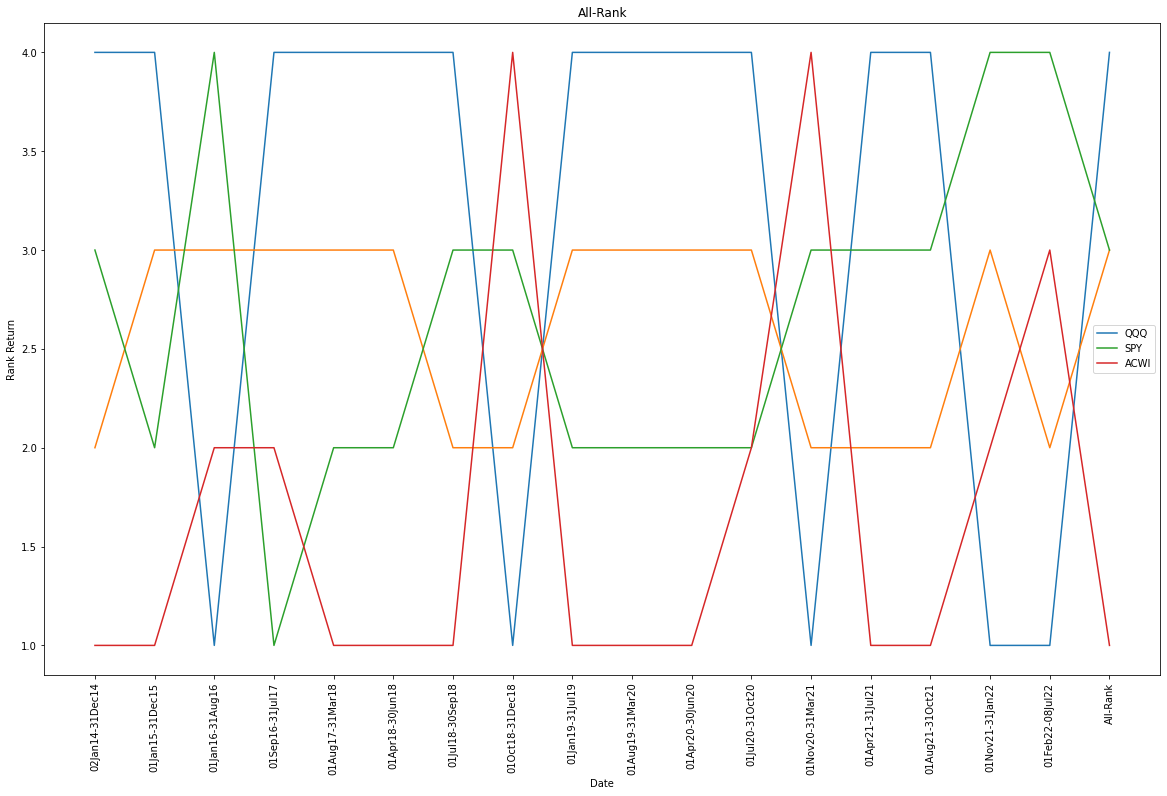

Fund-Period,02Jan14-31Dec14,01Jan15-31Dec15,01Jan16-31Aug16,01Sep16-31Jul17,01Aug17-31Mar18,01Apr18-30Jun18,01Jul18-30Sep18,01Oct18-31Dec18,01Jan19-31Jul19,01Aug19-31Mar20,01Apr20-30Jun20,01Jul20-31Oct20,01Nov20-31Mar21,01Apr21-31Jul21,01Aug21-31Oct21,01Nov21-31Jan22,01Feb22-08Jul22,All-Rank,%Rank
QQQ,4.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,4.0,100.0
_AVG_,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,75.0
SPY,3.0,2.0,4.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,3.0,75.0
ACWI,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,25.0


In [66]:
fund_x=fund_x.set_index("Period",drop=True)
rankCol_name_all='All-Rank'
rank_x=find_rank(fund_x,list_fund_name,rankCol_name_all)
plot_rank_line(rank_x, rankCol_name_all)
rank_x

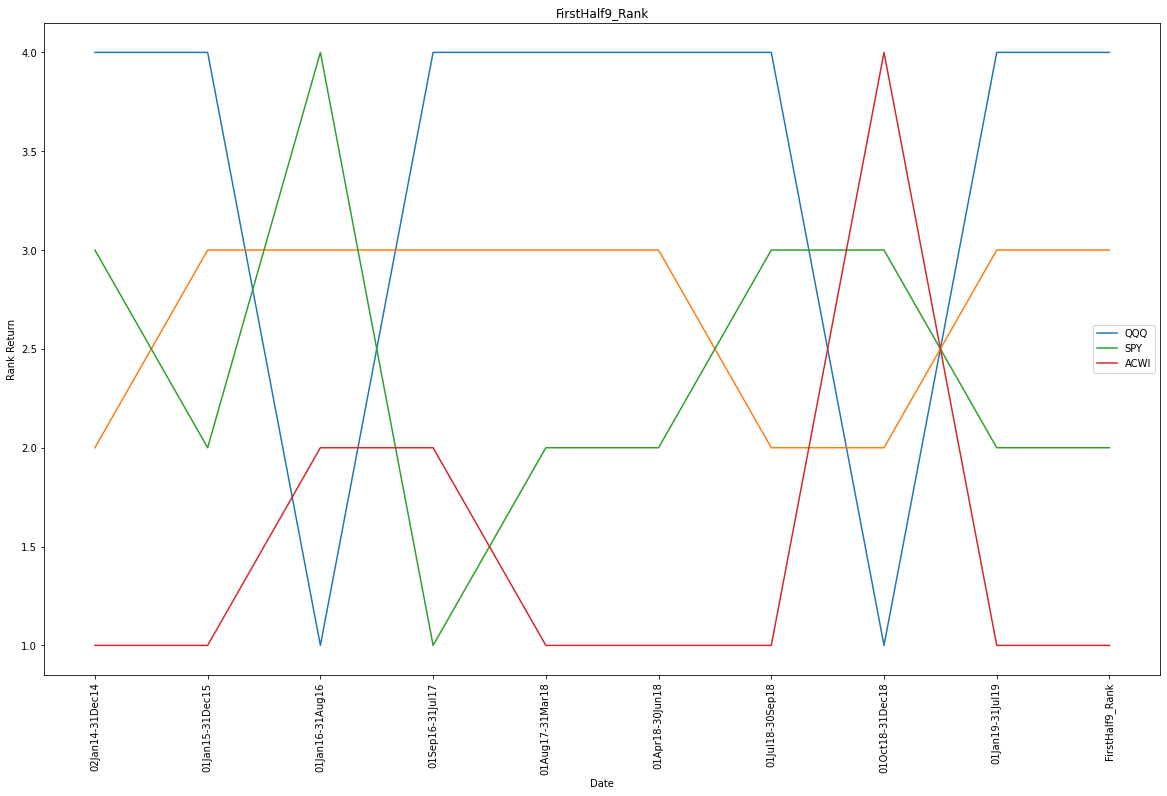

Fund-Period,02Jan14-31Dec14,01Jan15-31Dec15,01Jan16-31Aug16,01Sep16-31Jul17,01Aug17-31Mar18,01Apr18-30Jun18,01Jul18-30Sep18,01Oct18-31Dec18,01Jan19-31Jul19,FirstHalf9_Rank,%Rank
QQQ,4.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,100.0
_AVG_,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,75.0
SPY,3.0,2.0,4.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,50.0
ACWI,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,25.0


In [67]:
fund_xFirstHalf=fund_xFirstHalf.set_index("Period",drop=True)
rankCol_name_first=f'FirstHalf{val_ma}_Rank'

rank_firstY=find_rank(fund_xFirstHalf,list_fund_name,rankCol_name_first)

plot_rank_line(rank_firstY,rankCol_name_first )
rank_firstY


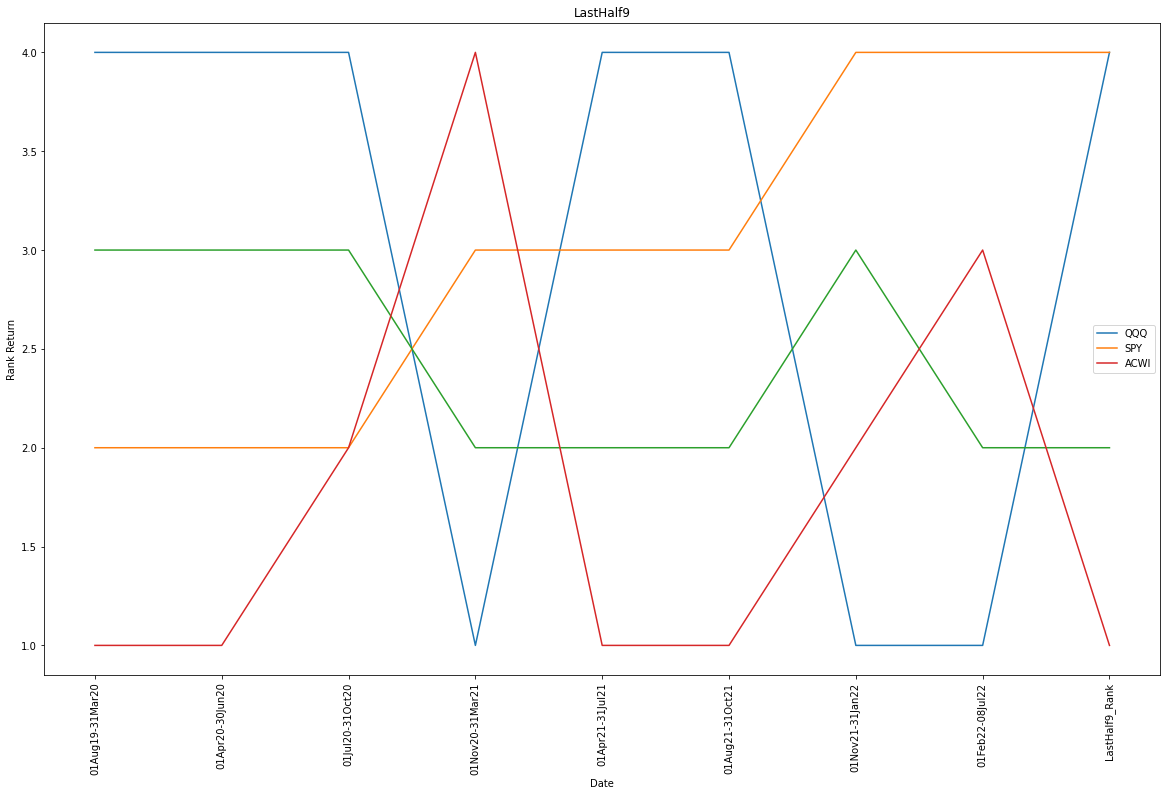

Fund-Period,01Aug19-31Mar20,01Apr20-30Jun20,01Jul20-31Oct20,01Nov20-31Mar21,01Apr21-31Jul21,01Aug21-31Oct21,01Nov21-31Jan22,01Feb22-08Jul22,LastHalf9_Rank,%Rank
QQQ,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,4.0,100.0
SPY,2.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,100.0
_AVG_,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,50.0
ACWI,1.0,1.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,25.0


In [68]:
fund_xLastHalf=fund_xLastHalf.set_index("Period",drop=True)

rankCol_name_last=f'LastHalf{val_ma}_Rank'
rank_y=find_rank(fund_xLastHalf,list_fund_name,rankCol_name_last)

plot_rank_line(rank_y, f'LastHalf{val_ma}')
rank_y

In [69]:
if requiredMAData:
    fund_averageLastHalf=fund_averageLastHalf.set_index("Period",drop=True)
    rankCol_name_MA=f'AvgLastHalf{val_ma}_Rank'
    rank_z=find_rank(fund_averageLastHalf,list_fund_name,rankCol_name_MA)
    plot_rank_line(rank_z, rankCol_name_MA)
    rank_z
    print(rank_z)


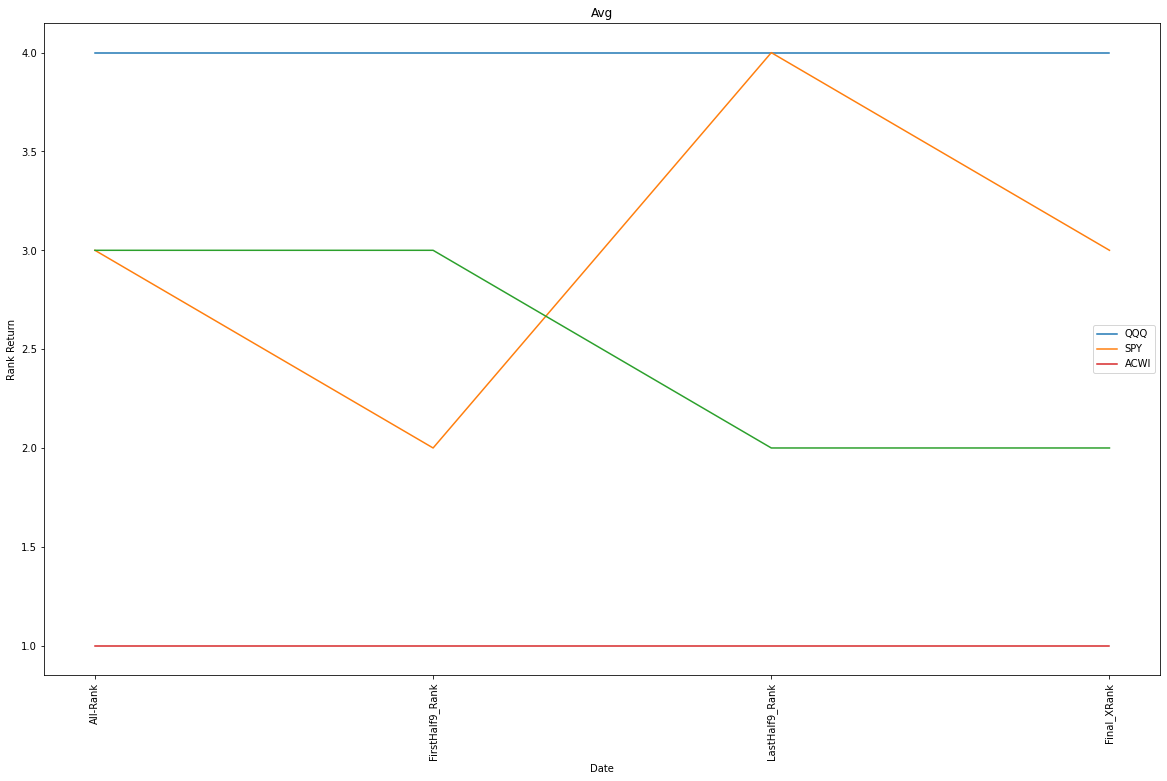

In [70]:
if requiredMAData==False:
 df_xyz_rank=pd.concat([ rank_x[rankCol_name_all],rank_firstY[rankCol_name_first],
                        rank_y[rankCol_name_last]],axis=1)
else:
 df_xyz_rank=pd.concat([ rank_x[rankCol_name_all],rank_firstY[rankCol_name_first], 
                        rank_y[rankCol_name_last],rank_z[rankCol_name_MA]],axis=1)


df_xyz_rank["Avg_XRank"]=df_xyz_rank.mean(axis=1).round(1)
df_xyz_rank["Final_XRank"]=df_xyz_rank["Avg_XRank"].rank(method='max')
    
df_xyz_rank=df_xyz_rank.sort_values(by="Final_XRank",ascending=False)

df_xyz_rank["%Rank"]=df_xyz_rank['Final_XRank'].rank(method='max',pct = True)
df_xyz_rank["%Rank"]=(df_xyz_rank["%Rank"]*100).round(1)

df_xyz_rank=df_xyz_rank.drop(columns=["Avg_XRank"])


plot_rank_line(df_xyz_rank , 'Avg')

In [71]:
   
def cal_statistics_des(x_cols,df_temp):
    
 des_colsOrder=['mean','50%', 'std','max','min','count']  
#  x_cols=x_cols.append("AverageMarket")
#  print(x_cols)
 df_stat_desc=df_temp[x_cols].describe()

 df_stat_desc=df_stat_desc[x_cols].round(1)

 df_stat_desc = df_stat_desc.T
 df_stat_desc=df_stat_desc.loc[:,des_colsOrder]   
 
    
 des_colsOrder=list(df_stat_desc.columns)
 df_stat_desc['mean-50%']= df_stat_desc['mean']-  df_stat_desc['50%']
 des_colsOrder.insert(2,'mean-50%')
 
 df_stat_desc=df_stat_desc.sort_values(by=des_colsOrder,ascending=False)

 df_stat_desc=df_stat_desc[des_colsOrder]
    
 return df_stat_desc,des_colsOrder

In [72]:
df_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_x)
df_stat_desc



,mean,50%,mean-50%,std,max,min,count
QQQ,8.6,8.7,-0.1,13.9,35.8,-19.2,17.0
_AVG_,5.8,6.4,-0.6,12.0,28.2,-16.5,17.0
SPY,5.4,6.4,-1.0,11.5,25.3,-14.3,17.0
ACWI,3.3,4.7,-1.4,11.5,23.5,-16.0,17.0


In [73]:
dfFirstHalf_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_xFirstHalf)
dfFirstHalf_stat_desc

,mean,50%,mean-50%,std,max,min,count
QQQ,10.2,10.4,-0.2,12.1,23.4,-17.1,9.0
_AVG_,6.7,7.1,-0.4,9.9,19.1,-15.1,9.0
SPY,6.3,6.9,-0.6,9.5,18.9,-14.3,9.0
ACWI,3.7,4.7,-1.0,8.9,15.0,-13.8,9.0


In [74]:
dfLastHalf_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_xLastHalf)
dfLastHalf_stat_desc

,mean,50%,mean-50%,std,max,min,count
QQQ,6.8,6.7,0.1,16.5,35.8,-19.2,8.0
_AVG_,4.7,5.3,-0.6,14.7,28.2,-16.5,8.0
SPY,4.5,5.1,-0.6,14.1,25.3,-14.2,8.0
ACWI,2.9,4.2,-1.3,14.4,23.5,-16.0,8.0


In [75]:
if requiredMAData:
    dfMA_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_averageLastHalf)
    print(dfMA_stat_desc)

In [76]:
# df_stat_all=pd.concat([df_stat_desc, dfLastHalf_stat_desc, dfMA_stat_desc])
# df_stat_all=df_stat_all.groupby(level=0).mean().round(1)
# df_stat_all

if requiredMAData:
 avgStatDesc_df=(df_stat_desc+dfFirstHalf_stat_desc+dfLastHalf_stat_desc+dfMA_stat_desc)/4
else:
 avgStatDesc_df=(df_stat_desc+dfFirstHalf_stat_desc+dfLastHalf_stat_desc)/3

avgStatDesc_df=avgStatDesc_df.round(1)
avgStatDesc_df=avgStatDesc_df.sort_values(by=des_colsOrder,ascending=False)
avgStatDesc_df=avgStatDesc_df.drop(columns=["count"])

avgStatDesc_df

,mean,50%,mean-50%,std,max,min
QQQ,8.5,8.6,-0.1,14.2,31.7,-18.5
_AVG_,5.7,6.3,-0.5,12.2,25.2,-16.0
SPY,5.4,6.1,-0.7,11.7,23.2,-14.3
ACWI,3.3,4.5,-1.2,11.6,20.7,-15.3


print("Find Min-Max")

def find_min_max(item,list_fund_name,find_x):
    item_dict= item[list_fund_name].to_dict()
    if find_x=="max":
     x_key = max(item_dict, key=item_dict.get)
    else:
     x_key = min(item_dict, key=item_dict.get)
    
    #print(f"{find_x} ={x_key} : {item_dict}")
    return x_key


def  find_mean_best_worst(df_temp,list_fundX):
 
 df_temp["best_fund"]=df_temp.apply(find_min_max,axis=1,args=(list_fundX,'max'))
 df_temp["worst_fund"]=df_temp.apply(find_min_max,axis=1,args=(list_fundX,'min'))

 df_temp=df_temp[['Period','No.Month','best_fund','worst_fund','average']+list_fundX]
 df_temp.set_index('Period',inplace=True)
 return df_temp


fund_x_best_worst=find_mean_best_worst(fund_x,list_fund_name)
fund_xLastHalf_best_worst=find_mean_best_worst(fund_xLastHalf,list_fund_name)


count_best=fund_x.groupby('best_fund').size()
count_worst=fund_x.groupby('worst_fund').size()
print(count_worst)
print("=============================")
print(count_best)

data = {"fund_best": count_best,
        "fund_worst": count_worst,
       }
df_best_worst = pd.concat(data,
               axis = 1)

df_best_worst=df_best_worst[["fund_best","fund_worst"]].fillna(0)

df_best_worst['heaven-hell']=df_best_worst['fund_best']-df_best_worst['fund_worst']
df_best_worst=df_best_worst.sort_values(by=['heaven-hell','fund_best', 'fund_worst'],ascending=False)
df_best_worst


In [77]:
# def plot_bar_performance(df):

#   fig, ax = plt.subplots(figsize = (18, 9))

#   X_axis = np.arange(len(df))
#   X_point=0.00
#   X_width=0.2  
#   listChart=[]  
    
#   for colName  in df.columns:
#     chart=ax.bar(X_axis+X_point,df[colName],X_width, label =colName)
#     X_point+=X_width
#     listChart.append(chart)
    


  
#   ax.set_xlabel("Period")
#   ax.set_ylabel("% Return")
#   ax.set_title("Fund Perforamnce Return")
#   ax.set_xticks(X_axis )
#   ax.set_xticklabels(list(df.index),rotation='vertical')
#   ax.legend()
#update matplotlib    
#   for chart in listChart:
#    ax.bar_label(chart, padding=3)
 
#   fig.tight_layout()  
#   plt.show()

    
def plot_bar_performance(df,x_chart):

  fig = plt.figure(figsize = (20, 10))

  X_axis = np.arange(len(df))
  X_point=0.00
  X_width=0.1  
  listChart=[]  
    
  for colName  in df.columns:
    chart=plt.bar(X_axis+X_point,df[colName],0.1, label =colName)
    X_point+=X_width
    listChart.append(chart)
    
 
  
  plt.xticks(X_axis, df.index,rotation='vertical')
  plt.xlabel("Period")
  plt.ylabel("% Return")
  plt.title(f"Fund Perforamnce Return {x_chart}")
  plt.legend()
   
  plt.savefig(f'{report_path}\\Retun_{x_chart}.png')

  plt.show()


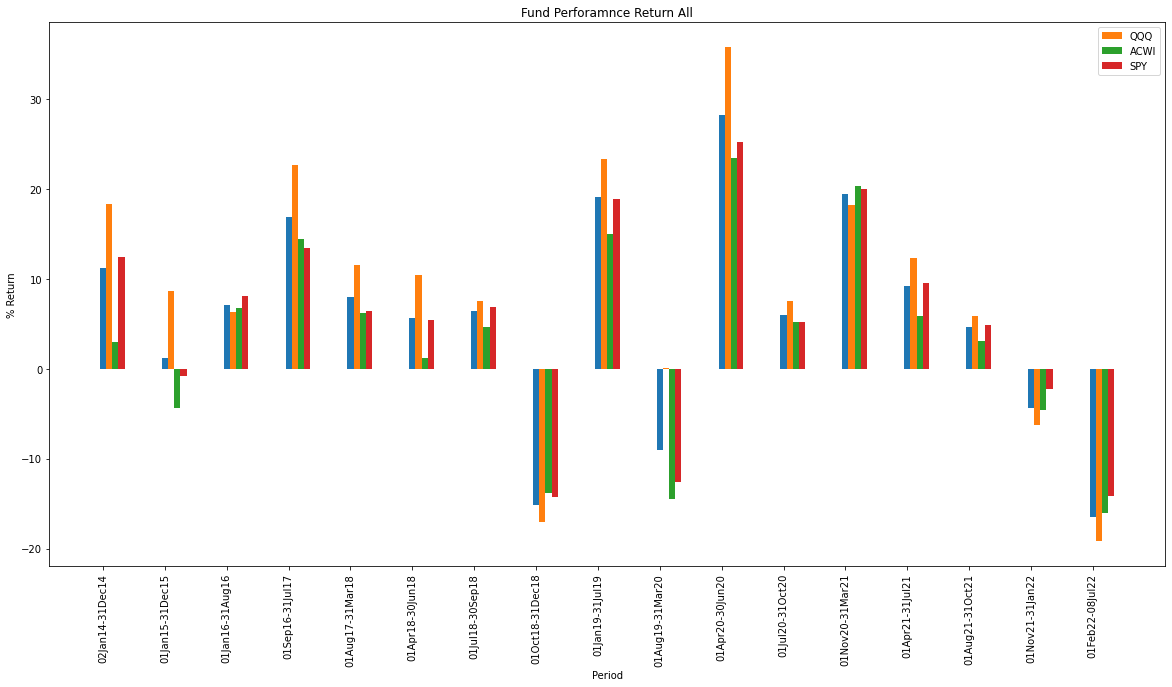

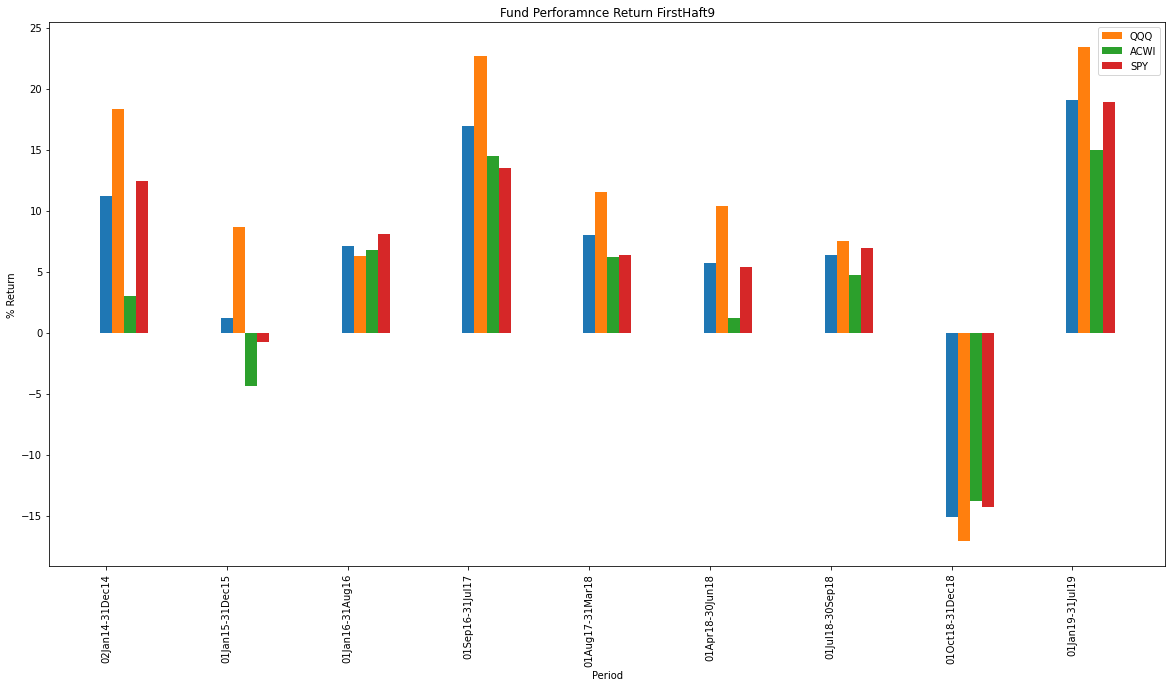

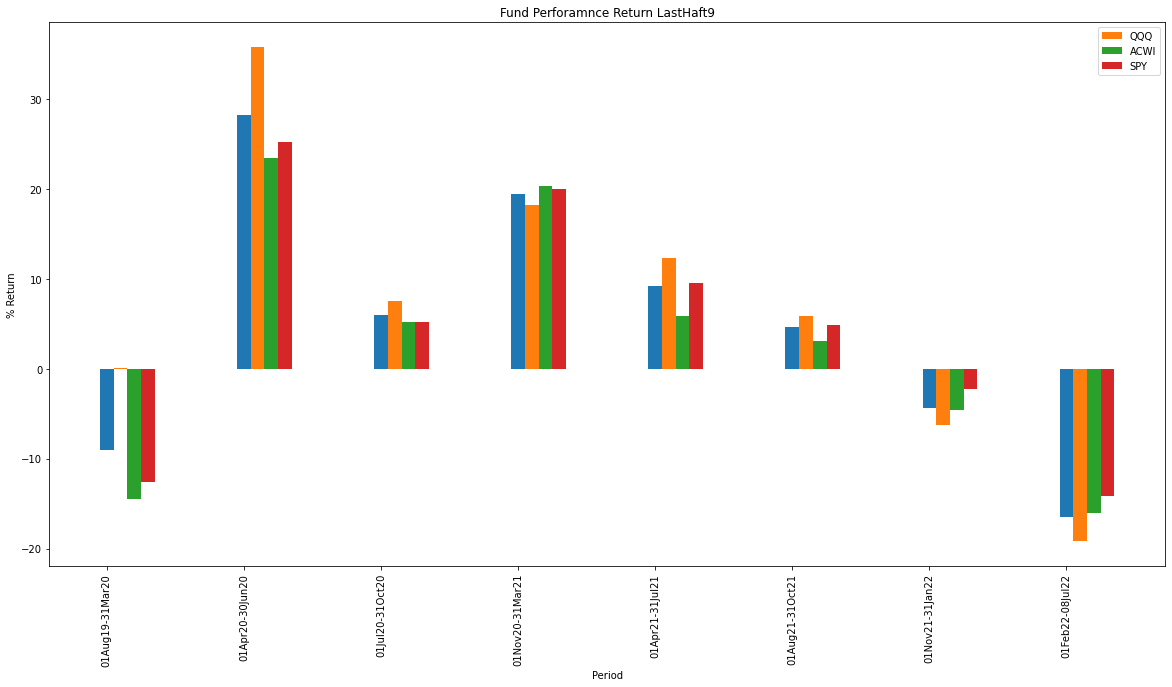

In [78]:
fund_x=fund_x.loc[:,list_fund_name]
fund_xFirstHalf=fund_xFirstHalf.loc[:,list_fund_name]
fund_xLastHalf=fund_xLastHalf.loc[:,list_fund_name]

plot_bar_performance(fund_x,'All')
plot_bar_performance(fund_xFirstHalf,f'FirstHaft{val_ma}')
plot_bar_performance(fund_xLastHalf,f'LastHaft{val_ma}')

if requiredMAData:
    fund_averageLastHalf  =fund_averageLastHalf.loc[:,list_fund_name]
    plot_bar_performance(fund_averageLastHalf,f'AvgLastHalf{val_ma}')

In [79]:
def appped_x_to_last_row(df):
 df_sum=df.sum(axis=0).to_frame(name='__sum')
 df_sum=df_sum.T
    
 df_avg=df.mean(axis=0).to_frame(name='__avg')
 df_avg=df_avg.T 
 df_avg=df_avg.round(1)   
    
 return pd.concat([df,df_sum,df_avg]) 


fund_x=appped_x_to_last_row(fund_x)
fund_xFirstHalf=appped_x_to_last_row(fund_xFirstHalf)
fund_xLastHalf=appped_x_to_last_row(fund_xLastHalf)
if requiredMAData:
    fund_averageLastHalf=appped_x_to_last_row(fund_averageLastHalf)

In [80]:

file_name = f"{title}_{start_test}_{end_test}.xlsx"
result_path=f"{report_path}\\{file_name}"
print(result_path)
print("Create Fund Performance  Report as Excel file")
writer=pd.ExcelWriter(result_path,engine='xlsxwriter') 

df_xyz_rank.to_excel(writer, sheet_name="Rank-Avg",index=True)
avgStatDesc_df.to_excel(writer, sheet_name="StatDes-Avg",index=True)

fund_x.to_excel(writer, sheet_name="Return",index=True)
rank_x.to_excel(writer, sheet_name="Rank",index=True)
df_stat_desc.to_excel(writer, sheet_name="StatDes",index=True)
  

fund_xFirstHalf.to_excel(writer, sheet_name=f"First{val_ma}-Return",index=True)
rank_firstY.to_excel(writer, sheet_name=f"First{val_ma}-Rank",index=True)
dfFirstHalf_stat_desc.to_excel(writer, sheet_name=f"First{val_ma}-StatDes",index=True)


fund_xLastHalf.to_excel(writer, sheet_name=f"FLast{val_ma}-Return",index=True)
rank_y.to_excel(writer, sheet_name=f"FLast{val_ma}-Rank",index=True)
dfLastHalf_stat_desc.to_excel(writer, sheet_name=f"FLast{val_ma}-StatDes",index=True)

if requiredMAData:
    fund_averageLastHalf.to_excel(writer, sheet_name=f"FAvg{val_ma}-Return",index=True)
    rank_z.to_excel(writer, sheet_name=f"FAvg{val_ma}-Rank",index=True)
    dfMA_stat_desc.to_excel(writer, sheet_name=f"FAvg{val_ma}-StatDes",index=True)

writer.save()

print("Successfully")

D:\JupyterCode\MyQuantFinProject\Report\3Worlds_y14-0722_bt100722_1056\3Worlds_y14-0722_bt100722_1056_02Jan14-31Dec14_01Feb22-08Jul22.xlsx
Create Fund Performance  Report as Excel file
Successfully
